**线性代数**

*标量*

In [1]:
import torch

x = torch.tensor([2.0])
y = torch.tensor([3.0])

x+y, x-y, x*y, x/y, x**y

(tensor([5.]), tensor([-1.]), tensor([6.]), tensor([0.6667]), tensor([8.]))

*向量 ——> 可看成标量值组成的列表*

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
# 张量索引访问
x[3]

tensor(3)

In [4]:
# 访问张量长度
len(x)

12

In [5]:
# 向量形状（仅有一个轴）
x.shape

torch.Size([12])

***矩阵***

In [6]:
# 指定分量m ,n，创建m * n的矩阵
A = torch.arange(20).reshape((4,5))
A

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [7]:
# 矩阵转置
A.T

tensor([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

In [8]:
# 对称矩阵
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])

print(B)

B == B.T

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [9]:
# 创建更多的轴
X = torch.arange(24).reshape((2,3,4))
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

***张量运算***

*加法 ---- 形状一致*

In [10]:
A = torch.arange(20, dtype=torch.float32).reshape((4,5))
B = A.clone() # 与B=A 区分，此处新开了存储空间，并把A的值克隆
A, A+B

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.,  8.],
         [10., 12., 14., 16., 18.],
         [20., 22., 24., 26., 28.],
         [30., 32., 34., 36., 38.]]))

*乘法 --- 按元素乘（哈达吗积）--- 形状一致*

In [11]:
A * B

tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.]])

*标量与张量相乘*

In [12]:
a = 2
X = torch.arange(24).reshape((2,3,4))
a+X, a*X, (a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 torch.Size([2, 3, 4]))

*计算张量元素的和*

In [13]:
x = torch.arange(5,dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3., 4.]), tensor(10.))

In [14]:
# 表示任意形状张量的元素
X.shape, X.sum()

(torch.Size([2, 3, 4]), tensor(276))

*指定张量沿着某一个轴通过求和降维（具体参加Sum_by_specific_axis.py）*

In [15]:
A

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])

In [16]:
"""
假设:
C.shape ---- (2,6,7,……,n)
axis = 0 ---->（6,7,……n）
axis = 1 ----> (2,7,……,n)
……

"""
A_sum_axis0 = A.sum(axis = 0)
A_sum_axis0, A_sum_axis0.shape

(tensor([30., 34., 38., 42., 46.]), torch.Size([5]))

In [17]:
A_sum_axis1 = A.sum(axis = 1)
A_sum_axis1, A_sum_axis1.shape

(tensor([10., 35., 60., 85.]), torch.Size([4]))

In [18]:
A.sum(axis=[0,1])

tensor(190.)

*平均值*

In [19]:
A.mean(), A.sum()/A.numel()

(tensor(9.5000), tensor(9.5000))

In [20]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000]),
 tensor([ 7.5000,  8.5000,  9.5000, 10.5000, 11.5000]))

*计算总值或均值时保持轴数不变*

In [21]:
Sum_A = A.sum(axis=1, keepdims=True)
Sum_A

tensor([[10.],
        [35.],
        [60.],
        [85.]])

*广播机制*

In [22]:
A/Sum_A

tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.1429, 0.1714, 0.2000, 0.2286, 0.2571],
        [0.1667, 0.1833, 0.2000, 0.2167, 0.2333],
        [0.1765, 0.1882, 0.2000, 0.2118, 0.2235]])

*按某个轴计算元素A的累积和*

In [23]:
A.cumsum(axis=0),A.cumsum(axis=1)

(tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  7.,  9., 11., 13.],
         [15., 18., 21., 24., 27.],
         [30., 34., 38., 42., 46.]]),
 tensor([[ 0.,  1.,  3.,  6., 10.],
         [ 5., 11., 18., 26., 35.],
         [10., 21., 33., 46., 60.],
         [15., 31., 48., 66., 85.]]))

*点积 --- 只能向量元素*

In [24]:
x, x.shape

(tensor([0., 1., 2., 3., 4.]), torch.Size([5]))

In [25]:
y = torch.randn(5)
y, y.shape

(tensor([-0.7949,  0.4636, -0.0156, -0.4128, -0.3412]), torch.Size([5]))

In [26]:
torch.dot(x,y),torch.sum(x*y)

(tensor(-2.1708), tensor(-2.1708))

*矩阵向量积Ax是一个长度为m的列向量，其第i个元素是点积ai.TX*

In [27]:
A.shape,x.shape,torch.mv(A,x)

(torch.Size([4, 5]), torch.Size([5]), tensor([ 30.,  80., 130., 180.]))

*矩阵乘法AB看作是简单地执行m次矩阵-向量积，并将结果拼接在一起，形成一个n×m矩阵*

In [28]:
B = torch.ones(5,3)
A.shape,B.shape

(torch.Size([4, 5]), torch.Size([5, 3]))

In [29]:
torch.mm(A,B)

tensor([[10., 10., 10.],
        [35., 35., 35.],
        [60., 60., 60.],
        [85., 85., 85.]])

*L2范数 -- 向量元素平方和的平方根*

In [30]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

*L1范数 -- 绝对值的和*

In [31]:
torch.abs(u).sum()

tensor(7.)

*矩阵 Frobenius范数 -- 矩阵元素平方和的平方根*

In [32]:
torch.norm(torch.ones(4,3))

tensor(3.4641)

***练习***
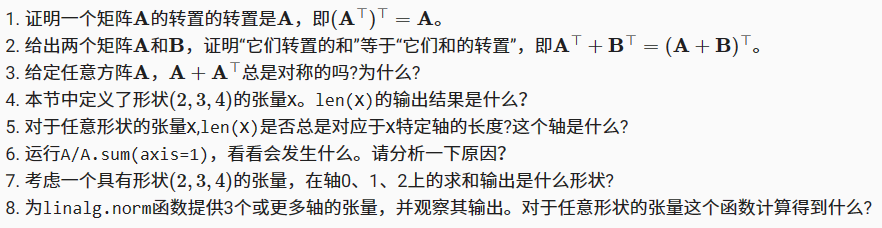

In [33]:
# QA1
A = torch.randn(3,4)
(A.T).T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [34]:
# QA2
B = torch.randn(3,4)
A.T + B.T == (A + B).T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [35]:
# QA3
A = torch.randn(4,4)
(A.T + A).T == (A.T + A)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [36]:
# QA4
A = torch.randn(2,3,4)
len(A)
# QA5:len(A)对应最外层轴的层数

2

In [37]:
# QA6 较绕
"""
A / A.sum(axis = 1) --- 报错，层数对不上
"""
A / A.sum(axis = 1,keepdims=True), A.shape, A.sum(axis = 1,keepdims=True).shape,(A / A.sum(axis = 1,keepdims=True)).shape

(tensor([[[-1.7867e+00, -2.8711e+00,  7.9141e-01,  1.7326e-01],
          [ 7.7190e+00,  6.3432e-01,  6.8459e-03,  1.1138e+00],
          [-4.9323e+00,  3.2368e+00,  2.0175e-01, -2.8710e-01]],
 
         [[-1.6064e-01,  5.3933e-01,  4.9963e+00,  4.8389e-01],
          [ 3.3770e-01,  8.9285e-01, -3.5957e+00,  5.7309e-01],
          [ 8.2295e-01, -4.3218e-01, -4.0059e-01, -5.6984e-02]]]),
 torch.Size([2, 3, 4]),
 torch.Size([2, 1, 4]),
 torch.Size([2, 3, 4]))

In [38]:
sum(A[0]),sum(A[1][0])

(tensor([ 0.1327, -0.1998,  2.5894, -2.0918]), tensor(-0.9708))

In [39]:
# QA7
A = torch.randn(2,3,4)
A.shape, A.sum(axis=0).shape, A.sum(axis=1).shape, A.sum(axis=2).shape

(torch.Size([2, 3, 4]),
 torch.Size([3, 4]),
 torch.Size([2, 4]),
 torch.Size([2, 3]))

In [40]:
# QA8
import numpy as np
A = torch.randn(2,3,5)
np.linalg.norm(A), torch.norm(A)

(4.4939322, tensor(4.4939))